In [23]:
#ПОДКЛЮЧЕНИЕ НЕОБХОЖИМЫХ ИНСТРУМЕНТОВ ДЛЯ РАБОТЫ С ДАННЫМИ.
import numpy as np #утилита для работы с мтарицами
import matplotlib.pyplot as plt #визуализация данных на графике
from sklearn.linear_model import LinearRegression #модель линейной регресии
from sklearn.metrics import r2_score #R2 метрика

In [44]:
# Данные
#Денежные доходы на душу населения
X1 = np.array([3947.2, 5167.4, 6399.0, 8088.3, 10154.8, 12540.2, 14863.6, 16895.0, 18958.4, 20780.0, 23221.1, 25684, 27412, 30254, 30865, 31897, 33361, 35506, 36240, 40304, 45307])
X1 = np.array([i * 12 for i in X1]).reshape(-1, 1)  # поиск для каждого года доход в год, умножив значения среднемесячного дохода на 12
#Индекс потребительских цен
X2 = np.array([103.1, 102.4, 101.8, 102.6, 102.4, 101.7, 102.3, 102.4, 101.6, 102.4, 100.5, 101.0, 100.6, 103.9, 101.0, 100.6, 100.3, 101.0, 100.4, 100.7, 101.0]).reshape(-1, 1)
X = np.hstack((X1, X2))  # объединение признаков в одну матрицу
#Данные по обороту розничной торговли пусть будут характеризовать условно спрос на рынке
Y = np.array([3765.4, 4529.7, 5642.5, 7041.5, 8711.9, 10869.0, 13944.2, 14599.2, 16512.0, 19104.3, 21394.5, 23685.9, 26356.2, 27526.8, 28240.9, 29745.5, 31579.4, 33624.3, 33873.7, 39472.0, 42577.0])
#года которые мы рассматриваем
years = np.array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])


In [39]:
# Линейная регрессия
model = LinearRegression() #обьект модели
model.fit(X, Y) #обучение обьекта на имеющихся данных

# Предсказание
Y_pred = model.predict(X) # по сути Y_pred это список полученых из модели предсказаний

# Расчет R^2
r2 = r2_score(Y, Y_pred)
print(f"R^2 score: {r2}")

R^2 score: 0.9976551497362426


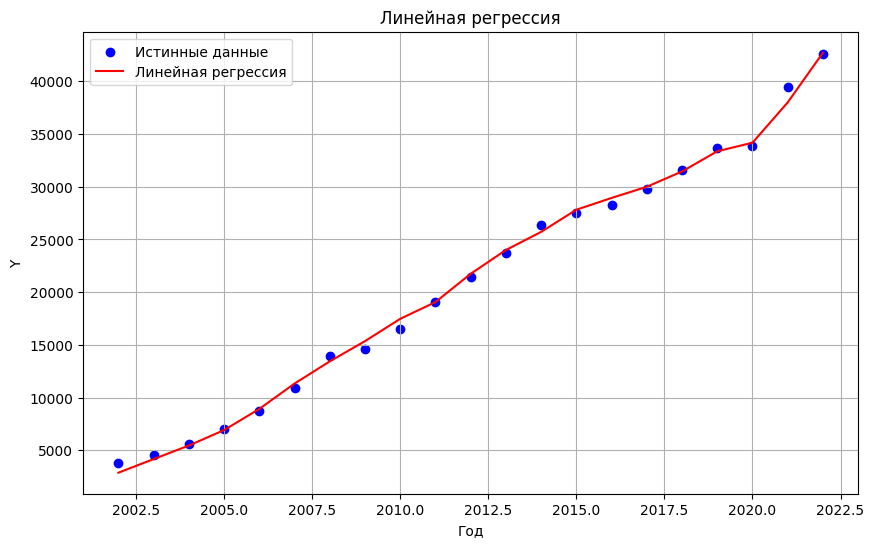

In [41]:
# Построение графика для визуального сравнения
plt.figure(figsize=(10, 6))
plt.scatter(years, Y, color='blue', label='Истинные данные')
plt.plot(years, Y_pred, color='red', label='Линейная регрессия')
plt.xlabel('Год')
plt.ylabel('Y')
plt.title('Линейная регрессия')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Коэффициенты модели
b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]

# Уравнение зависимости
equation = f"Оборот розничной торговли (спрос) = {b0:.2f} + {b1:.2f} * Денежные доходы на душу населения + {b2:.2f} * Индекс потребительских цен"
print(equation)

Оборот розничной торговли (спрос) = 18178.71 + 0.08 * Денежные доходы на душу населения + -184.89 * Индекс потребительских цен


In [45]:
# Целевое значение оборота розничной торговли (увеличение в два раза по сравнению с 2022 годом)
target_Y = 2 * 42577.0

# Индекс потребительских цен за 2022 год
X2_2022 = 101.0

# Прогнозирование необходимых изменений в денежных доходах населения
# Используем модель для предсказания значения Y при фиксированном X2 и изменяем X1
X1_values = np.linspace(45307 * 12, 100000 * 12, 1000).reshape(-1, 1)  # диапазон возможных значений X1
X_pred = np.hstack((X1_values, np.full((1000, 1), X2_2022)))  # фиксированное значение X2
Y_pred = model.predict(X_pred)

# Находим значение X1, при котором Y_pred близко к target_Y
best_index = np.argmin(np.abs(Y_pred - target_Y))
best_X1 = X1_values[best_index][0]

print(f"Денежные доходы населения должны составить {best_X1 / 12:.2f} рублей в месяц, чтобы оборот розничной торговли увеличился в два раза по сравнению с 2022 годом при неизменной инфляции.")

Денежные доходы населения должны составить 89816.92 рублей в месяц, чтобы оборот розничной торговли увеличился в два раза по сравнению с 2022 годом при неизменной инфляции.


In [46]:
# Денежные доходы населения за 2022 год
X1_2022 = 45307 * 12

# Целевое значение оборота розничной торговли (увеличение на 1% по сравнению с 2022 годом)
target_Y = 1.01 * 42577.0

# Прогнозирование необходимых изменений в индексе потребительских цен
# Используем модель для предсказания значения Y при фиксированном X1 и изменяем X2
X2_values = np.linspace(100, 110, 1000).reshape(-1, 1)  # диапазон возможных значений X2
X_pred = np.hstack((np.full((1000, 1), X1_2022), X2_values))  # фиксированное значение X1
Y_pred = model.predict(X_pred)

# Находим значение X2, при котором Y_pred близко к target_Y
best_index = np.argmin(np.abs(Y_pred - target_Y))
best_X2 = X2_values[best_index][0]

print(f"Индекс потребительских цен должен составить {best_X2:.2f}, чтобы оборот розничной торговли вырос на 1% при неизменном денежном доходе на душу населения.")

Индекс потребительских цен должен составить 100.00, чтобы оборот розничной торговли вырос на 1% при неизменном денежном доходе на душу населения.


In [31]:
print('103,1 102,4 101,8 102,6 102,4 101,7 102,3 102,4 101,6 102,4 100,5 101,0 100,6 103,9 101,0 100,6 100,3 101,0 100,4 100,7 101,0'.replace(",", ".").replace(" ", ", "))

103.1, 102.4, 101.8, 102.6, 102.4, 101.7, 102.3, 102.4, 101.6, 102.4, 100.5, 101.0, 100.6, 103.9, 101.0, 100.6, 100.3, 101.0, 100.4, 100.7, 101.0
